# Paper Figure 6: Quantification

Additional run 


In [1]:
import os
from test_files import get_files, prepare_test

tmp_folder = os.path.join(os.getcwd(),'temp/')
test_folder = 'fig6'

In [56]:
import pandas as pd
ref = pd.read_hdf('E:/benchmark/PXD006109/Shotgun/results.hdf', 'protein_table')

In [57]:
species = []
for _ in ref.index:
    
    if 'HUM' in _:
        species.append('Homo sapiens')
        
    elif 'ECO' in _:
        species.append('Escherichia coli')
        
    else:
        species.append('X')

In [58]:
import numpy as np
ref['Species'] = species
df_= ref.copy()
ds = [_ for _ in df_.columns if '_LFQ' in _]
base_columns = [_ for _ in ds if 'HeLa2' in _]
ratio_columns = [_ for _ in ds if 'HeLa12' in _]
to_plot = pd.DataFrame()
to_plot['Species'] = df_['Species']
to_plot['base'] = df_[base_columns].median(axis=1)
to_plot['ratio'] = df_[ratio_columns].median(axis=1)
to_plot['base_cnt'] = df_[base_columns].notna().sum(axis=1)
to_plot['ratio_cnt'] = df_[ratio_columns].notna().sum(axis=1)
to_plot['ratio_'] = np.log2(to_plot['base'] / to_plot['ratio'])
to_plot['sum_'] = np.log2(to_plot['ratio'])
valid_ap = to_plot.query(f'ratio_cnt >= 2 and base_cnt >=2')

In [59]:
def get_species(valid):

    homo = valid[valid['Species'] == 'Homo sapiens']
    e_coli = valid[valid['Species'] == 'Escherichia coli']
    
    return homo, e_coli

In [60]:
homo_mq, e_coli_mq = get_species(valid_ap)

Homo 0.27
Ecoli 0.46


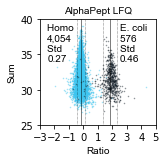

In [61]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

hfont = {'fontname':'Arial', 'size':10}

dark_blue = '#17212b'
light_blue = '#3dc5ef'
teal= '#42dee1'
green = '#6eecb9'
yellow = '#eef5b3'

plt.figure(figsize=(2.363,2.363)) #60x60
plt.plot(homo_mq['ratio_'], homo_mq['sum_'], '.', alpha=0.5, color = light_blue, markersize=1)
plt.plot(e_coli_mq['ratio_'], e_coli_mq['sum_'], '.', alpha=0.5, color = dark_blue, markersize=1)

mean_ = homo_mq['ratio_'].mean()
std_ = homo_mq['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

print(f'Homo {std_:.2f}')
plt.text(-2.5, 34, f'Homo \n{len(homo_mq):,}\nStd \n{std_:.2f}', **hfont)

mean_ = e_coli_mq['ratio_'].mean()
std_ = e_coli_mq['ratio_'].std()
plt.axvline(mean_, color = 'k', linewidth=0.5)
plt.axvline(mean_+std_, linestyle=':', color='k', linewidth=0.5)
plt.axvline(mean_-std_,  linestyle=':', color='k', linewidth=0.5)

print(f'Ecoli {std_:.2f}')

plt.text(2.5, 34, f'E. coli\n{len(e_coli_mq):,} \nStd \n{std_:.2f}', **hfont)

plt.xlim([-3, 5])
plt.ylim([25, 40])
ax = plt.gca()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Ratio', **hfont)
plt.ylabel('Sum', **hfont)
plt.title('AlphaPept LFQ', **hfont)
plt.tight_layout()
plt.xticks([-3,-2,-1,0,1,2,3,4,5])
plt.savefig('figures/06_ap_full.pdf')
plt.show()